# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

In [1]:
# Solution
#1 n_estimators
#2 max_depth
#3 max_features
#4 bootstrap - decreasing the bootstrap sample will increase the diversity among the individual trees, may increase randoess of the foresr, reduce overfitting
#smaller bootstrapsresults in lower overall perfor,ance. usually bootstrap sample the same as the number of samples in original dataset

1. n_estimators: the number of trees in the forest. The more trees the better the model slearns the data, but it can be a slow process if there are too many trees. Try to find the spot where the model performs the best with the least possible number of trees.
2. max_depth: the amounts of splits in each tree, it captures more information on the data. Too much depth and model risks being overfit.
3. max_features:  the number of features when searching for the best splot. Usually set max_features=n_features. Too many features. Too many will lead to overfitting.
4. Bootstrap: lowering the amount of bootstraps will increase the diversity of the trees, which can lead to more randomness of the forest, and help with the overfitting. 

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

### Solution
Usually bootstrap sample the same as the number of samples in original dataset.

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [2]:
#solution part 1: Creating a figure that compares PCA, LDA, t-SNE & UMAP on digits dataset
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap as umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

X = X_digits
y = y_digits
dataset= data_digits


#Creating a model that can create all the plots at the same time:
def dim_red(X, y, TypeRed, dataset, ax):
    #starting by standarizing using the StandardScaler()
    sc = StandardScaler()
    X_std = sc.fit_transform(X)
    
    #LDA needs both data and target as imput so I have to create a choosing mechanism
    if TypeRed==LDA:
        X_typered=TypeRed().fit_transform(X_std,y)
    else:
        X_typered=TypeRed().fit_transform(X_std)
        
    t1, t2 = X_typered[:,0], X_typered[:,1]
        
    #creating a plot with matplotlib
    ax.scatter(t1, t2, c=y)
    ax.set_title(TypeRed.__name__)

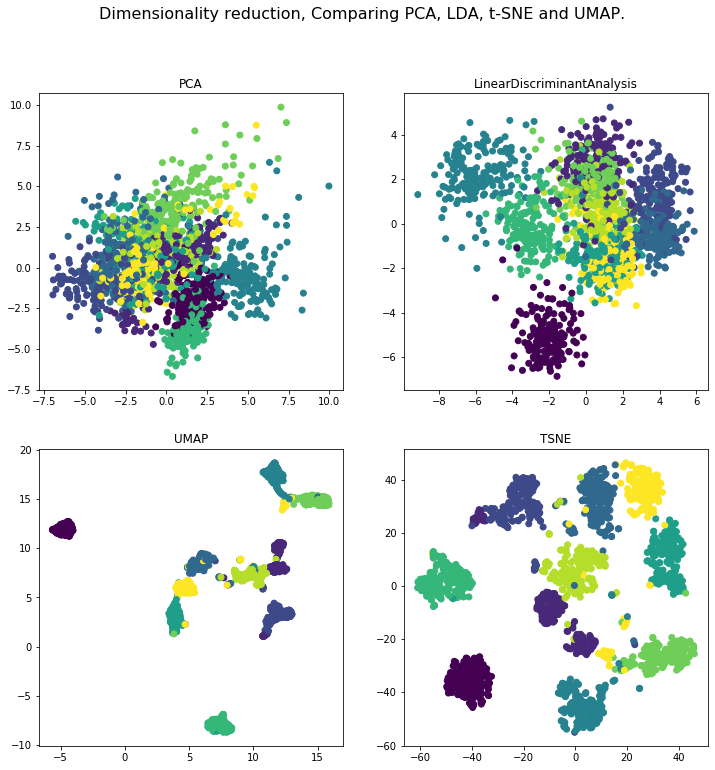

In [3]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
fig.suptitle(str("Dimensionality reduction, Comparing PCA, LDA, t-SNE and UMAP."), fontsize=16)

dim_red(X, y, PCA, dataset, ax[0][0])
dim_red(X, y, LDA, dataset, ax[0][1])
dim_red(X, y, umap.UMAP, dataset, ax[1][0])
dim_red(X, y, TSNE, dataset, ax[1][1])

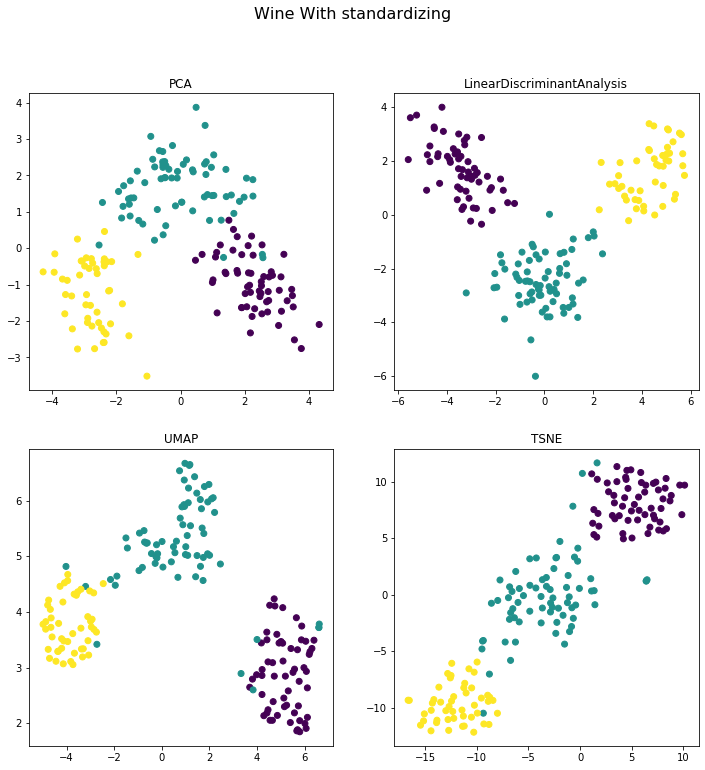

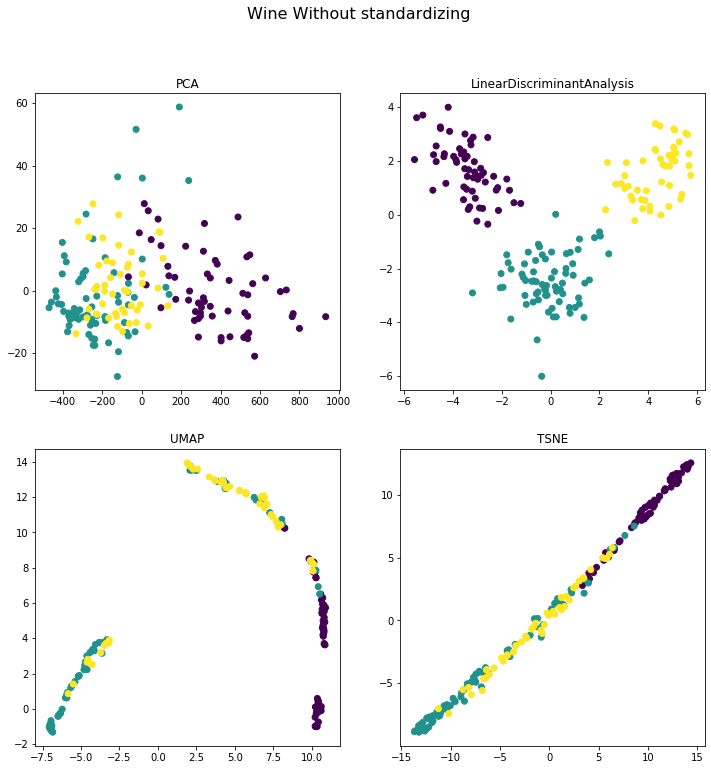

In [4]:
# Part 2 Wine With standardizing

X = X_wine
y = y_wine
dataset= data_wine

fig, ax = plt.subplots(2,2, figsize = (12,12))
fig.suptitle('Wine With standardizing', fontsize=16)

dim_red(X, y, PCA, dataset, ax[0][0])
dim_red(X, y, LDA, dataset, ax[0][1])
dim_red(X, y, umap.UMAP, dataset, ax[1][0])
dim_red(X, y, TSNE, dataset, ax[1][1])

#Part 2 Wine without standardizing

def dim_red2(X, y, TypeRed, dataset, ax):
    #LDA needs both data and target as imput so I have to create a choosing mechanism
    if TypeRed==LDA:
        X_typered=TypeRed().fit_transform(X,y)
    else:
        X_typered=TypeRed().fit_transform(X)
    t1, t2 = X_typered[:,0], X_typered[:,1]
        
    #creating a plot with matplotlib
    ax.scatter(t1, t2, c=y)
    ax.set_title(TypeRed.__name__)

fig, ax = plt.subplots(2,2, figsize = (12,12))
fig.suptitle('Wine Without standardizing', fontsize=16)
dim_red2(X, y, PCA, dataset, ax[0][0])
dim_red2(X, y, LDA, dataset, ax[0][1])
dim_red2(X, y, umap.UMAP, dataset, ax[1][0])
dim_red2(X, y, TSNE, dataset, ax[1][1])

#### Part 2: The problem without scandardizing:

It clusters on top of each other making it hard it analyse. By scaling it, it increases the variance in the dataset and decrease the impact of outliers.

### Part 3:

Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data. 

The results vary greatly within the different methods an whether there has been scaling of the data.
The PCA is unsupervised linear transformation, it aims to find the direction of maximal variance in the data and put it into a new subspave with fewer features than the original one. It is sensitive to scaling, which is very obvious from two plots of the wine dataset. 
LDA is supervised and tries to find the feature subspace that optimizes class seperability. LDA is  not sensitive to scaling of the data which is very obvious in the results.
Its is obvious that both the non-linear dimension reduction algorithms seem to be very sensitive to scaling, which makes sence with non-linear properties. And they both perform fairly well.

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

### Solution

If a tree is honest it means that it "does not use the same information for selecting model stucture as for estimation given a model structure." Meaning that we split up the training set, such that one sample is used to construct the a tree and one is used to estimate tratment effects.
The intuition is simply that if we use the same information for both, we might introduce bias (correlations between covariates and outcome) into the model.
The practical implementation of the Decision Tree algorithm is we have to estimate on smaller samples of the dataset. This means that it costs some in terms of MSE of treatment effects, but the method gives better nominal covarge for confidence intervals.